In [1]:
import os
import glob

In [26]:
# Take a look in the Stocks directory to select one dataset from a company
import os
print(os.listdir('C:/Users/hp/Desktop/stock_data'))

['ETFs', 'Stocks']


In [27]:
file_list = glob.glob(os.path.join(os.getcwd(), "ETFs", "*.txt"))

In [28]:
corpus = []

In [29]:
for file_path in file_list:
    with open(file_path) as f_input:
        corpus.append(f_input.read())

print (corpus)

[]


In [30]:
number_files = len(file_list)
print(number_files)

0


In [32]:
os.chdir('C:/Users/hp/Desktop/stock_data/Stocks/')

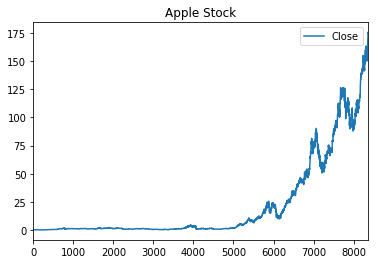

In [33]:
def stock_graph(symbol,title):
    df = pd.read_csv("C:/Users/hp/Desktop/stock_data/Stocks/{}.us.txt".format(symbol))
    df[['Close']].plot()
    plt.title(title)
    plt.show()

stock_graph("aapl","Apple Stock")

In [34]:
import seaborn as sns

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [39]:
filename = 'C:/Users/hp/Desktop/Stocks/googl.us.txt'

In [40]:
# Prices is the predict value and initial the independet variable (y)
Prgoo = pd.read_csv(filename,sep=',',index_col='Date')
prices = Prgoo['Close'].tolist()
initial = (Prgoo['Open']).tolist()

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
#Convert to 1d Vector
prices = np.reshape(prices, (len(prices), 1))
initial = np.reshape(initial, (len(initial), 1))

In [43]:
Prgoo.head(5)

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2004-08-19,50.000,52.03,47.980,50.170,44703800,0
2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2004-08-23,55.375,56.74,54.525,54.700,18274400,0
2004-08-24,55.620,55.80,51.785,52.435,15262600,0
2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [44]:
#First, let's check the correlation between the features of the dataset of google.

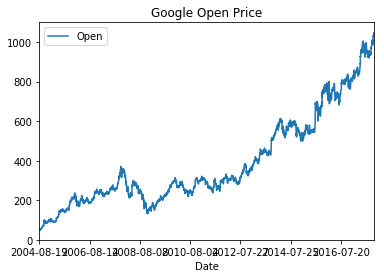

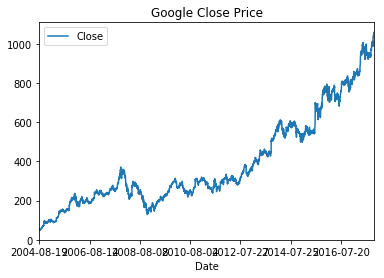

In [45]:
Prgoo[['Open']].plot()
plt.title('Google Open Price')
plt.show()

Prgoo[['Close']].plot()
plt.title('Google Close Price')
plt.show()

In [46]:
#It can be observed that all both "open" and "close" has the same trend.
#with naked eye can be say that they have a positive correlation.

In [47]:
plt.subplots(figsize=(8,6))
sns.heatmap(Prgoo.corr(),annot=True, linewidth=.5,)

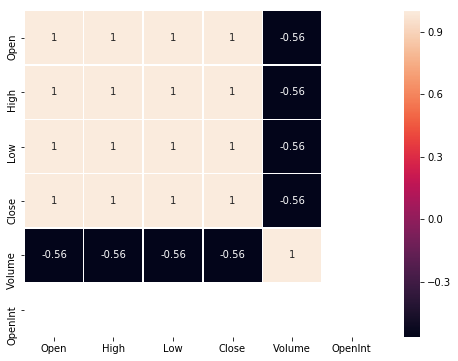

In [48]:
import pylab
pylab.show()

In [49]:
sns.distplot(Prgoo['Open'], hist = False, kde = True, kde_kws = {'linewidth': 5},label='Open',) 
sns.distplot(Prgoo['Close'], hist = False, kde = True, kde_kws = {'linewidth': 3},label='Close') 

plt.legend(prop={'size': 10}, title = 'Types',loc= 'best')
plt.title('Density Plot the Open and Close of the stock prices')
plt.xlabel('Prices')
plt.ylabel('Density')

Text(0,0.5,'Density')

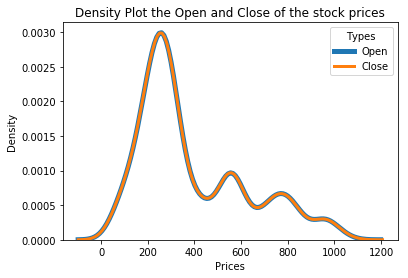

In [50]:
pylab.show()

In [51]:
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Train-set / R2 score: 0.999517054626


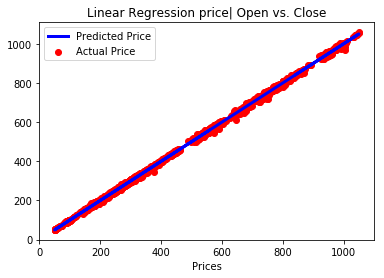

In [52]:
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

Test-set/ R2 score: 0.999558796016


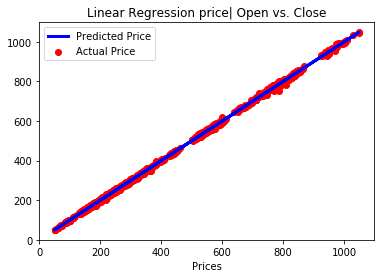

In [53]:
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

In [54]:
#In this example we use information a Google, but this company is pretty stable in the stock prices so 
#the simple correlation is going to get a good performance, 
#but with other companies that could have more random behavior the simple linear regression may have issues. 

In [56]:
def stocks_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv("C:/Users/hp/Desktop/stock_data/Stocks/{}.us.txt".format(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

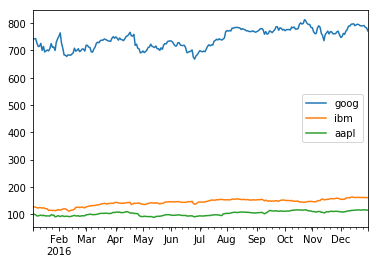

In [57]:
dates = pd.date_range('2016-01-02','2016-12-31',freq='B')
symbols = ['goog','ibm','aapl']
df = stocks_data(symbols, dates)
df.fillna(method='pad')
#print(df)
df.interpolate().plot()
plt.show()

goog    742.580
ibm     125.970
aapl     98.885
Name: 2016-01-05 00:00:00, dtype: float64


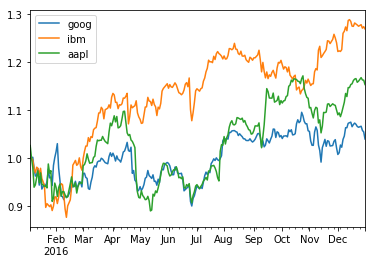

In [58]:
print(df.iloc[1,:])
df = df / df.iloc[1,:]
df.interpolate().plot()
plt.show()

In [66]:
#filenames = [x for x in os.listdir("./Stocks/") if x.endswith('.txt') and os.path.getsize(x) > 0]
import random
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 8)
print(filenames)

['fivn.us.txt', 'rnem.us.txt', 'dmlp.us.txt', 'mobl.us.txt', 'ahpaw.us.txt', 'ubsh.us.txt', 'clir.us.txt', 'cgen.us.txt']


In [69]:
#Read data into dataframes¶
data = []
for name in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = name.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [70]:
data[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0,fivn
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0,fivn
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0,fivn
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0,fivn
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0,fivn


In [75]:
fivn = pd.read_csv(filenames[0],sep=',',index_col='Date')
rnem = pd.read_csv(filenames[1],sep=',',index_col='Date')
dmlp = pd.read_csv(filenames[2],sep=',',index_col='Date')
mobl = pd.read_csv(filenames[3],sep=',',index_col='Date')
ahpaw = pd.read_csv(filenames[4],sep=',',index_col='Date')
clir = pd.read_csv(filenames[5],sep=',',index_col='Date')
cgen = pd.read_csv(filenames[6],sep=',',index_col='Date')
ubsh = pd.read_csv(filenames[7],sep=',',index_col='Date')

In [77]:
# create close DataFrame
close_price = pd.DataFrame()
close_price['fivn'] = fivn['Close']
close_price['rnem'] = rnem['Close']
close_price['dmlp'] = dmlp['Close']
close_price['mobl'] = mobl['Close']
close_price['ahpaw'] = ahpaw['Close']
close_price['clir'] = clir['Close']
close_price['cgen'] = cgen['Close']
close_price['ubsh'] = ubsh['Close']

In [78]:
close_price = close_price.fillna(method='ffill')

In [79]:
close_price.index =close_price.index.astype('datetime64[ns]')#our index is not the Date. but we'll
#make Date column as the index, as we know that the stock market data is related to the time.

In [80]:
close_price.describe()

,fivn,rnem,dmlp,mobl,ahpaw,clir,cgen,ubsh
count,910.000000,99.000000,910.000000,863.000000,216.000000,910.000000,910.000000,910.000000
mean,10.704121,52.123741,16.499116,5.562404,0.440068,25.874096,5.198219,6.320681
std,6.400384,1.491773,4.718686,2.466355,0.054100,5.225315,1.731110,1.738268
min,3.580000,49.291000,7.864600,2.570000,0.200000,18.397000,2.900000,2.575000
25%,5.482500,51.572000,13.309250,3.750000,0.400000,21.745500,3.750000,4.862500
50%,7.880000,52.636000,15.369000,4.350000,0.450000,23.714500,4.900000,6.540000
75%,15.433750,53.080000,20.100000,7.900000,0.470000,31.135000,6.057500,7.517500
max,25.820000,54.280000,28.438000,12.050000,0.540000,36.843000,10.730000,10.390000


In [81]:
close_price.head(10)

,fivn,rnem,dmlp,mobl,ahpaw,clir,cgen,ubsh
Date,,,,,,,,
2014-04-04,7.64,NaN,20.667,NaN,NaN,22.537,10.28,10.39
2014-04-07,7.11,NaN,20.588,NaN,NaN,22.355,9.97,9.99
2014-04-08,7.10,NaN,20.785,NaN,NaN,22.326,10.59,9.91
2014-04-09,7.12,NaN,20.933,NaN,NaN,22.462,10.73,10.25
2014-04-10,7.27,NaN,20.861,NaN,NaN,22.319,10.36,9.78
2014-04-11,7.37,NaN,20.989,NaN,NaN,22.219,9.97,9.49
2014-04-14,7.36,NaN,21.413,NaN,NaN,22.435,10.11,9.31
2014-04-15,7.80,NaN,21.460,NaN,NaN,22.489,9.89,9.20
2014-04-16,7.73,NaN,21.432,NaN,NaN,22.445,10.27,9.17


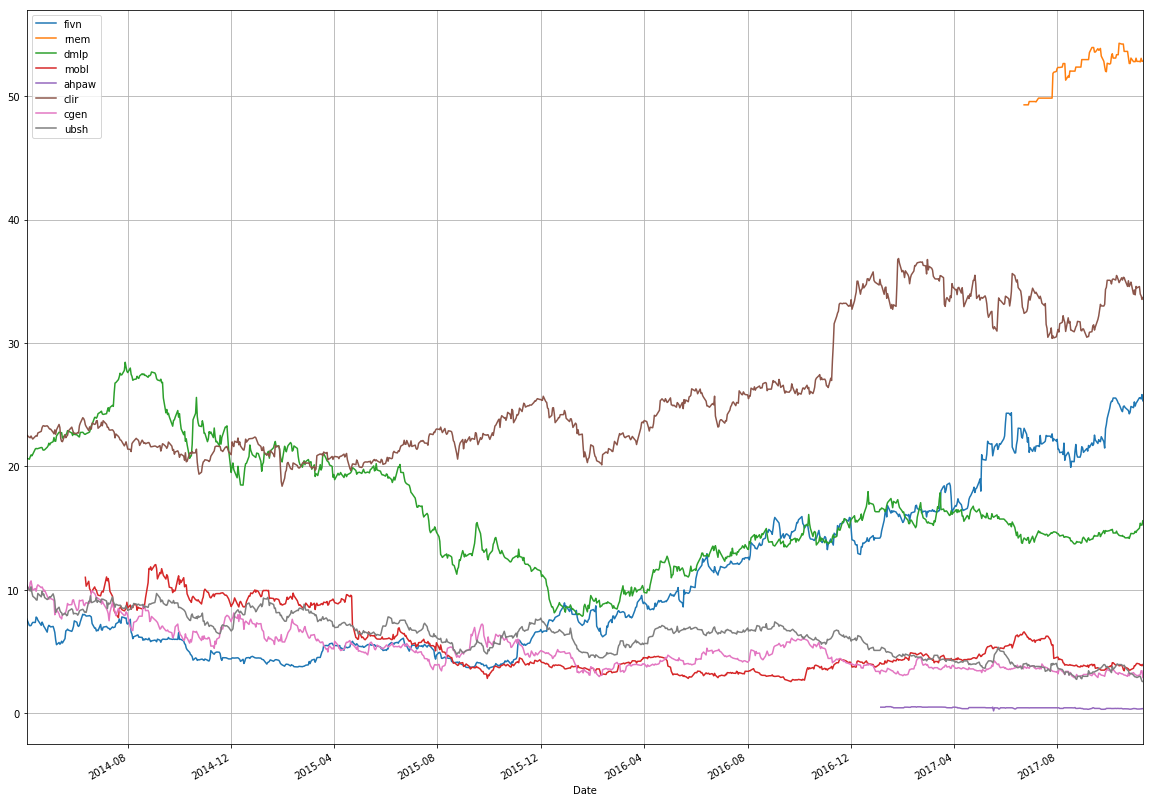

In [86]:
%matplotlib inline
_ = pd.concat([close_price['fivn'],close_price['rnem'],close_price['dmlp'],close_price['mobl'],close_price['ahpaw'],close_price['clir'],close_price['cgen'],close_price['ubsh']],axis=1).plot(figsize=(20,15),grid=True)

In [101]:
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix

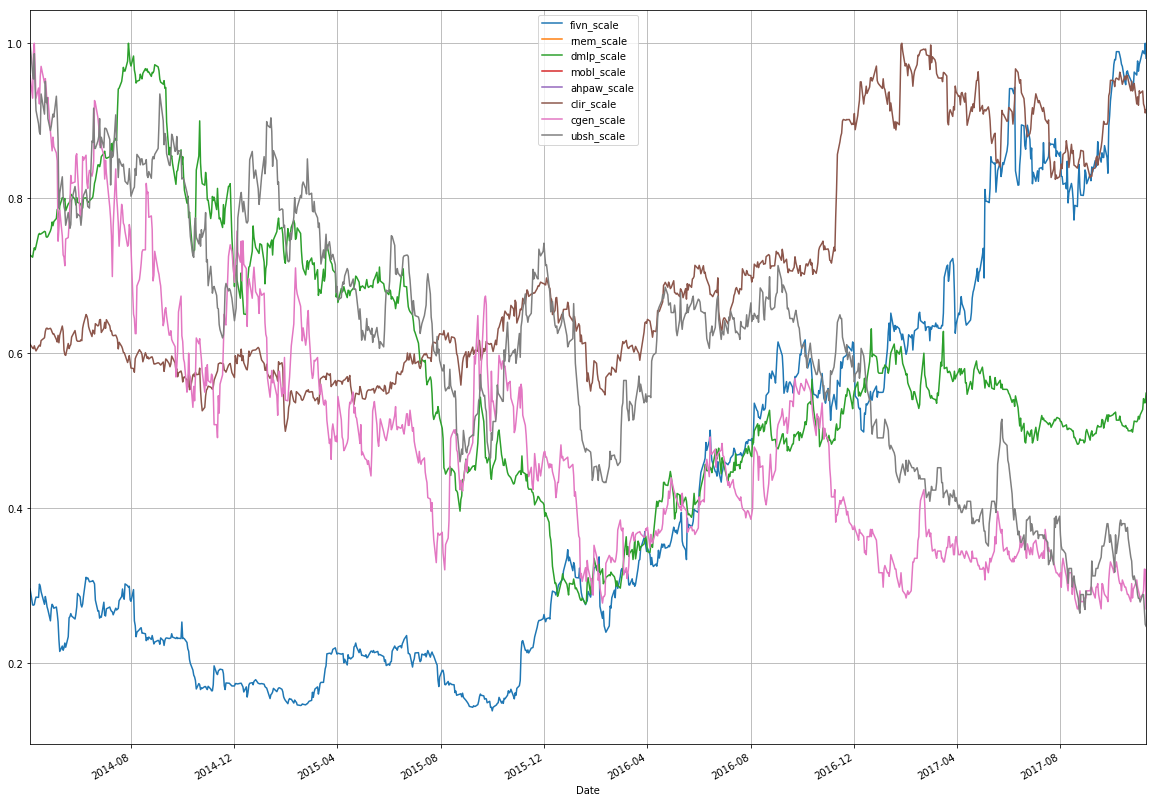

In [94]:
#Divide by the maximum value to match the indexes and reschedule. Then all maximum value can not but be less than 1.
company_list = close_price.columns
for idx in company_list:
    close_price[idx+'_scale'] = close_price[idx]/max(close_price[idx])
_ = pd.concat([close_price['fivn_scale'],close_price['rnem_scale'],close_price['dmlp_scale'],close_price['mobl_scale'],close_price['ahpaw_scale'],close_price['clir_scale'],close_price['cgen_scale'],close_price['ubsh_scale']],axis=1).plot(figsize=(20,15),grid=True)
fig = plt.figure()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  # Remove the CWD from sys.path while we load stuff.


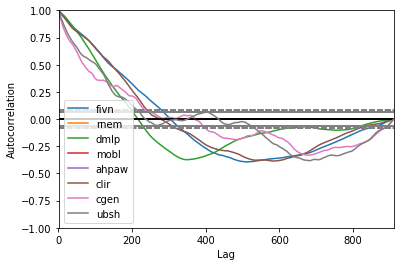

In [106]:
%matplotlib inline
#An autocorrelation plot shows the properties of a type of data known as a time series.
#A time series refers to observations of a single variable over a specified time horizon. 
#For example, the daily price of Microsoft stock during the year 2013 is a time series.
fig.set_figwidth(20)
fig.set_figheight(15)

for i in company_list:
    if '_scale' not in i:
        _ = autocorrelation_plot(close_price[i],label=i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


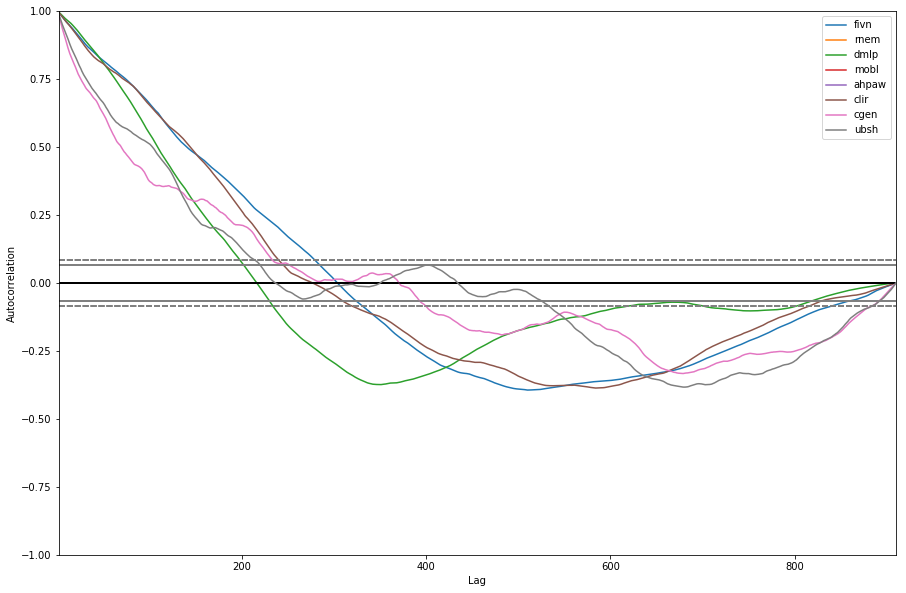

In [110]:
#checking correlation between stock price and time
#The autocorrelation with lag zero always equals 1, because this represents the autocorrelation between each term and itself. 
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
for i in company_list:
    if '_scale' not in i:
        _ = autocorrelation_plot(close_price[i],label=i)

In [111]:
#Most of the companies, except for 1, are in decline in 4th year, so they seem to have a correlation with each other.

In [131]:
score = regressor.score(xtest, ytest)
print(score)

0.999558796016
